In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, train_test_split
import sys
import pandas as pd
import shap

name = "shadow"
with open("features/features_" + name + ".csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

data = pd.read_csv("features/features_" + name + ".csv")
labels = pd.read_csv("labels/labels_" + name + ".csv",header=None, names=['name', 'label'])
data = data.merge(labels, on='name')
y = data.loc[:,"label"]
X = data.drop(["name","label"], axis = 1)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [5]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model1 = search.best_estimator_

The best parameters are {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 7} with a score of 0.87893 in training and a score of 0.91149 in testing


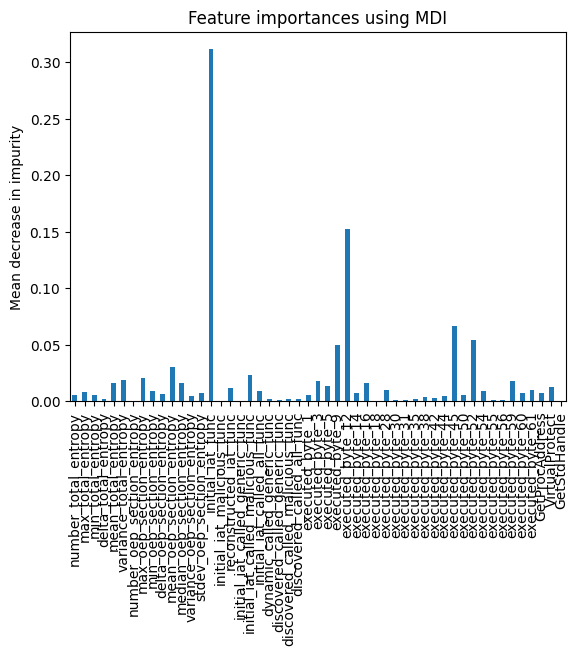

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [3]:
importances = model1.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.loc[(forest_importances != 0.0)]
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

#shap.initjs()
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_train)
#shap.summary_plot(shap_values, X_train, show=False)

explainer = shap.Explainer(model1)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])

In [6]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model2 = search.best_estimator_

The best parameters are {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 4, 'n_estimators': 32} with a score of 0.90453 in training and a score of 0.93785 in testing


In [ ]:
importances = model2.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.loc[(forest_importances != 0.0)]
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

In [ ]:
param_grid = {"criterion":["friedman_mse","squared_error"],"loss": ["log_loss","exponential"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
gbdt = GradientBoostingClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model3 = search.best_estimator_

In [ ]:
importances = model3.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.loc[(forest_importances != 0.0)]
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

In [23]:
data_static = pd.read_csv("features/static_features_" + name + ".csv")
data_static = data_static.merge(labels, on='name')
data_static = data_static.merge(data.loc[:,"name"], on='name')
y1 = data_static.loc[:,"label"]
X1 = data_static.drop(["name", "label"], axis = 1)
feature_names1 = [i for i in range(119)]
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X1, y1):
    X1_train, X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

The best parameters are {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2} with a score of 0.91239 in training and a score of 0.91620 in testing


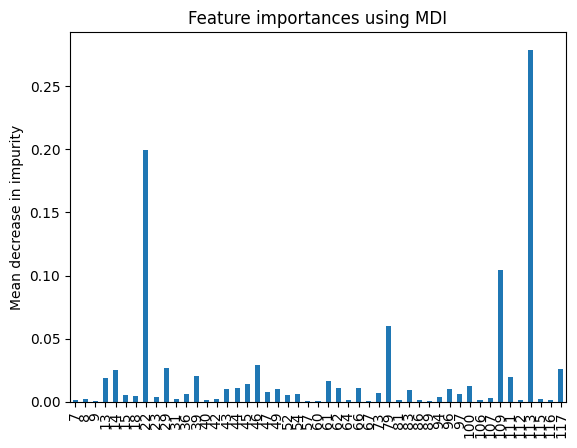

In [24]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X1_train, y1_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X1_test,y1_test))
)
model4 = search.best_estimator_

In [ ]:
importances = model4.feature_importances_
forest_importances = pd.Series(importances, index=feature_names1)
forest_importances = forest_importances.loc[(forest_importances != 0.0)]
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

The best parameters are {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 4, 'n_estimators': 35} with a score of 0.92643 in training and a score of 0.94821 in testing


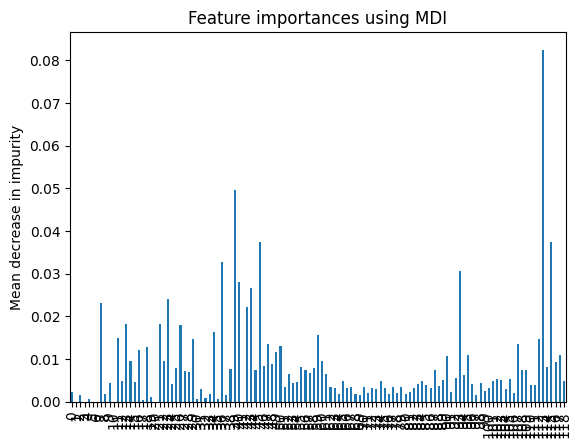

In [25]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X1_train, y1_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X1_test,y1_test))
)
model5 = search.best_estimator_

In [ ]:
importances = model5.feature_importances_
forest_importances = pd.Series(importances, index=feature_names1)
forest_importances = forest_importances.loc[(forest_importances != 0.0)]
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

In [ ]:
param_grid = {"criterion":["friedman_mse","squared_error"],"loss": ["log_loss","exponential"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
gbdt = GradientBoostingClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X1_train, y1_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X1_test,y1_test))
)
model6 = search.best_estimator_

In [ ]:
importances = model6.feature_importances_
forest_importances = pd.Series(importances, index=feature_names1)
forest_importances = forest_importances.loc[(forest_importances != 0.0)]
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()